# Projeto 1 - Ciência dos Dados
### Aluno: Ana Clara Carneiro de Freitas - 2A

<img src="OCDE.jpg" width=600 height=500 align="center">

## Pergunta a ser respondida:
Os três principais objetivos da OCDE (Organização para a Cooperação e Desenvolvimento Económico) é que seus membros, ao ingressarem na organização, tenham a possibilidade de desenvolver a economia, o emprego e o nível de vida em seus países.  Dessa forma, foi elaborado a seguinte hipótese: Ao se tornar membro desta organização, é possível perceber que esses setores (economia, emprego e idh) são beneficiados?

## Explicação da hipótese e mecanismo:
Logo, após elaborar a hipótese, foi iniciado a busca por dados, pesquisas sobre a Organização e seus países membros. Assim, primeiramente foram selecionados quais seriam os países escolhidos para validar a hipótese, sendo eles Israel, Chile e Estônia; pois tais países entraram no ano de 2010, possuindo um maior período de análise, mais dados e maior influência da OCDE na economia.

Dessa maneira, quatro bases de dados foram analisadas e utilizadas para compor a pesquisa, entre elas estão a taxa de desemprego anual e o GDP por trabalhador de cada país para analisar se a taxa de empregados aumentou ao decorrer dos anos. Para o setor econômico foi analisado o GDP dos países membros e, para medir se o nível de vida melhorou, foi utilizado o IDH. Afinal, com a ajuda desses dados foi possível analisar analíticamente todos os anos, principalmente antes, durante e depois da entrada; e ver como foi o comportamento desses dados durante esse período. A utilização destes permitiu uma visão mais ampla, tanto da parte econômica quanto da social dos países escolhidos.

Após isso, foi necessário escolher qual país seria utilizado para comparar os dados. Assim, um dos critérios analisados para escolher tal país foi um IDH parecido e, depois de ler mais sobre a Organização, foi possível descobrir que ela só aceita países compostos por economias com um elevado PIB per capita e Índice de Desenvolvimento Humano e que são considerados países desenvolvidos. Logo, com tal conceito em mente, a Colômbia foi escolhida como país à ser comparado, pois ela é um dos países que assinaram o acordo de adesão mas ainda não são membros, ou seja, possui um desenvolvimento semelhante aos outros escolhidos.

Dessa forma, foi possível reunir informações o suficiente as quais poderiam ser capazes de comprovar ou refutar a hipótese.


### Recursos de busca:
- https://www.cafetorah.com/taxa-de-desemprego-em-israel-e-a-menor-em-50-anos/
- https://economia.estadao.com.br/noticias/geral,o-emprego-reflete-a-economia,10000014535
- https://pt.wikipedia.org/wiki/Organiza%C3%A7%C3%A3o_para_a_Coopera%C3%A7%C3%A3o_e_Desenvolvimento_Econ%C3%B3mico


### fatores analisados:
- desenvolver o emprego: *taxa de desemprego* e GDP por trabalhador
- aumentar o nível de vida: idh e expectativa de vida
- apoiar um crescimento económico duradouro: *gdp total* (objetivo de quantificar a atividade econômica de uma região)


# Análise dos dados:

In [65]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

In [66]:
import os
print(os.getcwd())

C:\Users\ana clara\Downloads


### Base utilizada:

Desemprego:
https://www.gapminder.org/tools/#$state$marker$axis_y$which=aged_15plus_unemployment_rate_percent&scaleType=linear&spaceRef:null;;;&chart-type=linechart

PIB/trabalhador:
https://www.gapminder.org/tools/#$state$time$value=2018;&entities$show$country$/$in@=isr&=chl&=est;;;;&marker$axis_y$which=gdpperemployee_us_inflation_adjusted&spaceRef:null;;;&chart-type=linechart

IDH: https://www.gapminder.org/tools/#$state$time$value=2015;&marker$axis_y$which=hdi_human_development_index&scaleType=linear&spaceRef:null;;;&chart-type=linechart

PIB/capita: https://www.gapminder.org/tools/#$state$marker$axis_y$which=gdp_per_capita_yearly_growth&scaleType=linear&spaceRef:null;;;&chart-type=linechart

In [67]:
desemprego = pd.read_excel('aged_15plus_unemployment_rate_percent.xlsx')
gdp_trabalhador = pd.read_excel('gdpperemployee_us_inflation_adjusted.xlsx')
idh = pd.read_excel('hdi_human_development_index.xlsx')
gdp_total = pd.read_excel('gdp_per_capita_yearly_growth.xlsx')
exp_vida = pd.read_excel('life_expectancy_years.xlsx')

### Informações sobre o desemprego:

#### Todas as informações:

In [68]:
dados_novosD = desemprego.set_index("país")    
dados_novosD.head()

,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
país,,,,,,,,,,,,,,,,,,,,,
Afeganistão,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.49,NaN,NaN,NaN,1.69,NaN,NaN,NaN,NaN,NaN
Albânia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.10,13.7,14.10,13.50,13.40,15.90,17.5,17.1,15.2,13.8
Argélia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.30,10.2,9.96,9.96,11.00,9.82,10.2,11.2,10.2,13.6
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.43,16.80,NaN,NaN,NaN,NaN,NaN,NaN
Antígua e Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
paises_na_OCDE = []
paises_OCDE = ["Áustria", "Bélgica", 'Dinamarca', 'França', 'Grécia', 'Islândia', 'Irlanda', 'Itália', 'Luxemburgo', 'Noruega', 'Países Baixos', 'Portugal', 'Reino Unido', 'Suécia', 'Suíça', 'Turquia', 'Alemanha', 'Espanha', 'Canadá', 'Estados Unidos', 'Japão', 'Finlândia', 'Austrália', 'Nova Zelândia', 'México', 'República Checa', 'Hungria', 'Polónia', 'Coreia do Sul', 'Eslováquia', 'Chile', 'Eslovênia', 'Israel', 'Estónia', 'Letônia', 'Lituânia']
for pais in desemprego ["país"]:
    if pais in paises_OCDE:
        paises_na_OCDE.append("sim")
    else:
        paises_na_OCDE.append('não')
dados_novosD["Está na OCDE"]=paises_na_OCDE
dados_novosD
    
 

,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Está na OCDE
país,,,,,,,,,,,,,,,,,,,,,
Afeganistão,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.69,NaN,NaN,NaN,NaN,NaN,não
Albânia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.70,14.100,13.50,13.40,15.900,17.500,17.100,15.200,13.80,não
Argélia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.20,9.960,9.96,11.00,9.820,10.200,11.200,10.200,13.60,não
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.430,16.80,NaN,NaN,NaN,NaN,NaN,NaN,não
Antígua e Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,não
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.65,7.710,7.18,7.22,7.100,7.270,NaN,NaN,8.35,não
Armênia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.500,18.300,17.600,17.80,não
Austrália,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.56,5.210,5.08,5.22,5.660,6.080,6.060,5.710,5.59,sim
Áustria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.30,4.820,4.56,4.87,5.330,5.620,5.720,6.010,5.50,sim


#### Limpeza da base dos dados:

In [70]:
dados_novo = dados_novosD.iloc[:,51:71]
dados_limposD=dados_novo[~dados_novosD[1998].isin(["NaN"])]
dados_limposD.head()

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
país,,,,,,,,,,,,,,,,,,,,
Argentina,12.70,14.10,15.00,17.30,19.60,15.40,13.50,11.50,10.10,8.47,7.84,8.65,7.71,7.18,7.22,7.10,7.27,NaN,NaN,8.35
Austrália,7.68,6.87,6.28,6.74,6.37,5.93,5.39,5.03,4.78,4.38,4.23,5.56,5.21,5.08,5.22,5.66,6.08,6.06,5.71,5.59
Áustria,5.52,4.70,4.69,4.01,4.85,4.78,5.83,5.63,5.24,4.86,4.13,5.30,4.82,4.56,4.87,5.33,5.62,5.72,6.01,5.50
Bahamas,7.65,7.45,NaN,6.87,9.05,10.80,10.20,10.20,7.54,7.88,8.18,14.30,NaN,14.50,14.00,16.20,13.80,12.00,12.70,NaN
Barbados,12.40,10.60,9.35,9.85,10.30,11.00,9.57,9.08,8.73,7.41,8.12,10.00,10.70,11.20,11.60,11.60,12.20,11.30,9.72,NaN


#### Dados selecionados dos paises membros da OCDE que entraram no ano de 2010 e país que não participa da organização:
##### (obs: participantes: Israel, Chile, Estônia; não participantes: Colômbia)

In [71]:
dados_paisesD = dados_limposD.loc[["Israel","Chile","Estônia","Colômbia","Argentina"]]
dados_paisesD

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
país,,,,,,,,,,,,,,,,,,,,
Israel,10.70,11.2,11.1,11.8,12.9,13.50,13.0,11.30,10.70,9.38,7.70,9.53,8.48,7.14,6.86,6.21,5.89,5.25,4.80,4.21
Chile,7.31,11.2,10.5,10.4,10.2,9.77,10.2,9.34,9.02,8.43,9.29,11.30,8.42,7.34,6.66,6.21,6.66,6.51,6.74,6.96
Estônia,9.51,11.6,13.4,13.1,10.0,11.30,10.2,8.03,5.91,4.59,5.45,13.50,16.70,12.30,10.00,8.63,7.35,6.19,6.76,5.76
Colômbia,15.00,20.1,20.5,15.0,15.6,14.20,13.7,11.90,NaN,11.20,11.30,12.10,11.00,10.10,9.74,9.05,8.57,8.30,8.69,8.87
Argentina,12.70,14.1,15.0,17.3,19.6,15.40,13.5,11.50,10.10,8.47,7.84,8.65,7.71,7.18,7.22,7.10,7.27,NaN,NaN,8.35


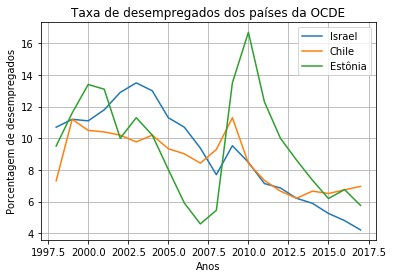

In [72]:
dados_testeD = dados_paisesD.transpose()
plt.plot(dados_paisesD.loc["Israel"])
plt.plot(dados_paisesD.loc["Chile"])
plt.plot(dados_paisesD.loc["Estônia"])
plt.xlabel('Anos')
plt.ylabel("Porcentagem de desempregados")
plt.title('Taxa de desempregados dos países da OCDE')
plt.legend()
plt.grid()


#### Gráfico comparativo com o país fora da OCDE:
Para melhor entendimento, os países membros da OCDE estão em azul e o não-membro está de vermelho

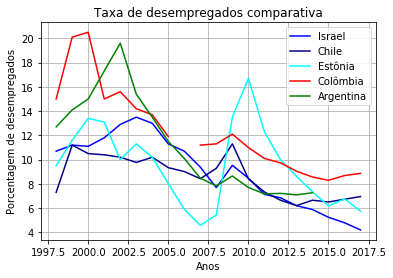

In [73]:
pais_comparadoD = dados_paisesD.transpose()
plt.plot(dados_paisesD.loc["Israel"], color = "blue")
plt.plot(dados_paisesD.loc["Chile"], color = "darkblue")
plt.plot(dados_paisesD.loc["Estônia"], color = "aqua")
plt.plot(dados_paisesD.loc["Colômbia"], color = "red")
plt.plot(dados_paisesD.loc["Argentina"], color = "green")
plt.xlabel('Anos')
plt.ylabel("Porcentagem de desempregados")
plt.title('Taxa de desempregados comparativa')
plt.legend()
plt.grid()

### Informações sobre GDP/trabalhador:
#### Todas as informações e limpeza da base:

In [74]:
dados_novosGDP = gdp_trabalhador.set_index("country")
dados_novosGDP = dados_novosGDP.iloc[:,1:33]
dados_novosGDP.head()


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2250,1650,1200,1560,1520,1400,1290,1190,1090,980,...,2380,2290,2200,2150,2150,2170,2210,2240,2300,2360
Albania,3580,4310,4750,5440,5860,4930,5540,6370,6580,7120,...,11800,12000,11700,11800,12100,12600,13100,13600,14200,14800
Algeria,17500,16800,16400,17400,16800,15800,16500,17000,17600,17100,...,16200,17600,18100,18400,18300,18500,18500,18700,18900,19200
Angola,7300,5310,5340,5770,6230,6510,6740,6740,6720,6780,...,9740,9840,9770,9430,9230,9150,9120,9140,9050,9030
Argentina,18500,20000,21100,21900,22200,22800,22700,22000,21700,21000,...,25600,24900,25200,24700,25200,25600,26200,27100,27800,28500


#### Dados selecionados dos paises membros da OCDE que entraram no ano de 2010 e país que não participa da organização:
##### (obs: participantes: Israel, Chile, Estônia; não participantes: Colômbia)

In [75]:
dados_paisesGDP = dados_novosGDP.loc[["Israel","Chile","Estonia","Colombia",'Argentina']]
dados_paisesGDP

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
country,,,,,,,,,,,,,,,,,,,,,
Israel,63300,61600,60500,61100,63300,65400,67600,68400,72200,71600,...,77600,78200,78500,80000,80900,82200,84000,86000,88000,90100
Chile,18700,19100,20000,21500,23100,24100,24600,25000,26300,26600,...,31900,32100,32300,32600,32900,33800,34500,35200,35800,36500
Estonia,14600,14600,14900,16600,17700,19700,20600,21200,24000,25800,...,35600,36300,36000,36400,37900,39300,41000,42900,44900,47000
Colombia,14200,13800,14100,14400,14600,14600,14600,14300,14400,13200,...,14700,15000,15200,15400,15600,15800,16200,16600,17000,17500
Argentina,18500,20000,21100,21900,22200,22800,22700,22000,21700,21000,...,25600,24900,25200,24700,25200,25600,26200,27100,27800,28500


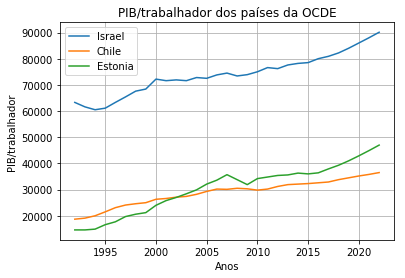

In [76]:
dados_testeGPD = dados_paisesGDP.transpose()
plt.plot(dados_paisesGDP.loc["Israel"])
plt.plot(dados_paisesGDP.loc["Chile"])
plt.plot(dados_paisesGDP.loc["Estonia"])
plt.xlabel('Anos')
plt.ylabel("PIB/trabalhador")
plt.title('PIB/trabalhador dos países da OCDE')
plt.legend()
plt.grid()


#### Gráfico comparativo com o país fora da OCDE:
Para melhor entendimento, os países membros da OCDE estão em azul e o não-membro está de vermelho

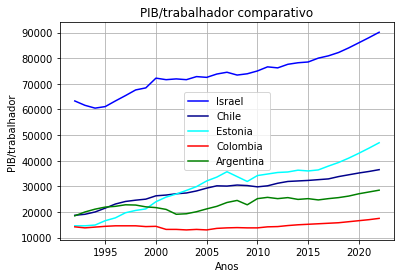

In [77]:
dados_testeGPD = dados_paisesGDP.transpose()
plt.plot(dados_paisesGDP.loc["Israel"], color = "blue")
plt.plot(dados_paisesGDP.loc["Chile"], color = "darkblue")
plt.plot(dados_paisesGDP.loc["Estonia"], color = "aqua")
plt.plot(dados_paisesGDP.loc["Colombia"], color = "red")
plt.plot(dados_paisesGDP.loc["Argentina"], color = "green")
plt.xlabel('Anos')
plt.ylabel("PIB/trabalhador")
plt.title('PIB/trabalhador comparativo')
plt.legend()
plt.grid()


## Informações sobre o IDH:

In [78]:
dados_novosIDH = idh.set_index("country")
dados_novosIDH.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,0.338,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,0.656,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,0.636,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.382,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


In [79]:
dados_paisesIDH = dados_novosIDH.loc[["Israel","Chile","Estonia","Colombia","Argentina"]]
dados_paisesIDH

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Israel,0.785,0.794,0.801,0.806,0.811,0.817,0.823,0.831,0.839,0.845,...,0.872,0.877,0.876,0.878,0.883,0.889,0.891,0.895,0.898,0.899
Chile,0.700,0.710,0.718,0.713,0.719,0.728,0.735,0.742,0.748,0.755,...,0.797,0.804,0.816,0.815,0.820,0.826,0.831,0.841,0.845,0.847
Estonia,0.728,0.723,0.715,0.708,0.712,0.722,0.733,0.746,0.758,0.764,...,0.829,0.835,0.836,0.833,0.838,0.850,0.856,0.860,0.863,0.865
Colombia,0.592,0.595,0.606,0.613,0.620,0.626,0.635,0.643,0.650,0.650,...,0.675,0.683,0.691,0.695,0.700,0.707,0.712,0.720,0.724,0.727
Argentina,0.705,0.713,0.720,0.725,0.728,0.731,0.738,0.746,0.753,0.764,...,0.788,0.792,0.794,0.802,0.816,0.822,0.823,0.825,0.826,0.827


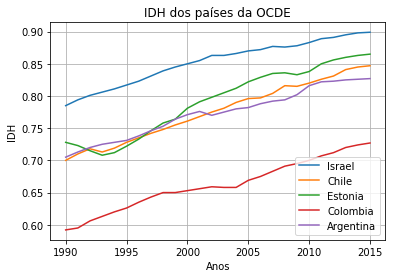

In [80]:
dados_testeIDH = dados_paisesIDH.transpose()
plt.plot(dados_paisesIDH.loc["Israel"])
plt.plot(dados_paisesIDH.loc["Chile"])
plt.plot(dados_paisesIDH.loc["Estonia"])
plt.plot(dados_paisesIDH.loc["Colombia"])
plt.plot(dados_paisesIDH.loc["Argentina"])
plt.xlabel('Anos')
plt.ylabel("IDH")
plt.title('IDH dos países da OCDE')
plt.legend()
plt.grid()


## Informações sobre GDP total

In [81]:
dados_novosGDP_total = gdp_total.set_index("country")
dados_novosGDP_total = dados_novosGDP_total.iloc[:,209:213]
dados_novosGDP_total.head()

,2010,2011,2012,2013
country,,,,
Afghanistan,5.170,3.850,11.20,1.13
Albania,2.980,2.490,2.28,1.72
Algeria,2.060,0.857,1.16,1.61
Andorra,-4.780,-4.300,NaN,NaN
Angola,0.594,1.030,2.13,1.03


In [82]:
dados_paisesGDP_total = dados_novosGDP_total.loc[["Israel","Chile","Estonia","Colombia","Argentina"]]
dados_paisesGDP_total

,2010,2011,2012,2013
country,,,,
Israel,2.72,2.35,1.130,1.11
Chile,4.75,4.96,4.510,3.31
Estonia,3.35,8.28,7.610,1.46
Colombia,2.75,5.39,2.990,3.04
Argentina,7.94,7.65,0.761,3.09


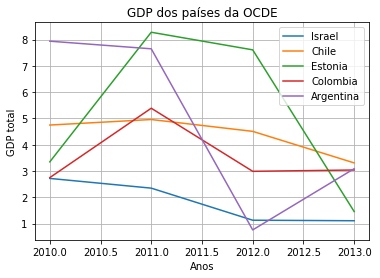

In [83]:
dados_testeGDP_total = dados_paisesGDP_total.transpose()
plt.plot(dados_paisesGDP_total.loc["Israel"])
plt.plot(dados_paisesGDP_total.loc["Chile"])
plt.plot(dados_paisesGDP_total.loc["Estonia"])
plt.plot(dados_paisesGDP_total.loc["Colombia"])
plt.plot(dados_paisesGDP_total.loc["Argentina"])
plt.xlabel('Anos')
plt.ylabel("GDP total")
plt.title('GDP dos países da OCDE')
plt.legend()
plt.grid()


## Informações sobre expectativa de vida:

In [84]:
dados_novosExp_vida = exp_vida.set_index("country")
dados_novosExp_vida = dados_novosExp_vida.iloc[:,190:219]
dados_novosExp_vida.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,51.6,51.3,51.4,51.4,50.7,51.1,51.4,51.1,50.1,51.5,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
Albania,73.9,73.9,73.9,73.9,74.0,74.1,74.3,72.5,74.3,74.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0
Algeria,71.0,71.4,71.7,72.0,72.1,72.3,72.8,73.0,73.1,73.5,...,76.3,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.9
Andorra,79.5,79.5,79.6,79.8,80.0,80.3,80.6,81.0,81.3,81.5,...,82.7,82.7,82.6,82.6,82.6,82.6,82.5,82.5,NaN,NaN
Angola,50.2,50.8,51.0,49.7,51.1,52.0,52.3,52.7,52.8,52.9,...,59.3,60.1,60.9,61.7,62.5,63.3,64.0,64.7,64.9,65.2


In [85]:
dados_paisesExp_vida = dados_novosExp_vida.loc[["Israel","Chile","Estonia","Colombia",'Argentina']]
dados_paisesExp_vida

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Israel,75.8,75.9,76.0,76.3,76.6,77.0,77.3,77.6,77.9,78.2,...,80.9,81.4,81.6,81.9,82.0,81.4,82.0,82.1,82.3,82.4
Chile,73.5,74.3,74.9,75.2,75.3,75.4,75.7,76.2,76.5,76.9,...,79.2,79.1,79.5,79.6,79.8,80.0,80.1,80.2,80.5,80.7
Estonia,70.0,69.6,69.3,68.3,67.0,67.9,69.9,70.1,69.8,70.5,...,75.0,76.0,76.3,76.3,77.1,77.1,77.2,77.4,77.5,77.7
Colombia,71.4,71.1,71.1,71.4,71.6,72.0,72.2,72.7,73.0,73.0,...,76.2,76.4,77.0,77.3,77.7,77.9,78.0,78.2,78.4,78.6
Argentina,72.1,72.3,72.5,72.7,73.0,73.1,73.3,73.5,73.7,73.9,...,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.7,76.8,77.0


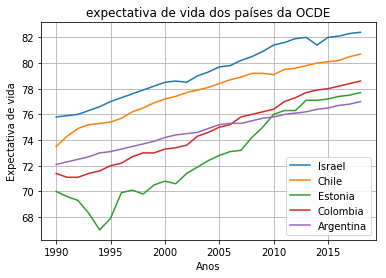

In [86]:
dados_testeExp_vida = dados_paisesExp_vida.transpose()
plt.plot(dados_paisesExp_vida.loc["Israel"])
plt.plot(dados_paisesExp_vida.loc["Chile"])
plt.plot(dados_paisesExp_vida.loc["Estonia"])
plt.plot(dados_paisesExp_vida.loc["Colombia"])
plt.plot(dados_paisesExp_vida.loc["Argentina"])
plt.xlabel('Anos')
plt.ylabel("Expectativa de vida")
plt.title('expectativa de vida dos países da OCDE')
plt.legend()
plt.grid()


# Conclusão:
Após realizar a leitura dos dados e feitura dos gráficos, foi possível tirar algumas conclusões sobre a hipótese elaborada anteriormente. Entre elas, está o fato de que, após os países ingressarem na Organização, num primeiro momento as taxas de desemprego sofreram um aumento, muitas vezes por causa da crise de 2008 ou apenas algumas mudanças economicas devido a entrada na OCDE, entretanto, nos anos seguintes, foi possível perceber uma queda significativa nestes índices. E, para completar a conclusão, foi realizado algumas pesquisas que afirmam que, para Israel, o ano de 2019, foi o ano com o menor indice de desemprego já registrado.

Agora, argumentando com a adesão do país comparativo no gráfico, os dados dos países membros da OCDE possuem algumas irregularidades, o que permite que o país não-membro, em alguns anos possuia taxas menores, porém os membros fecham com uma média menor no período pós entrada no bloco do que o não-membro.

Outro fator a ser analisado é o PIB/trabalhador, o qual, como apresentado no gráfico conclusivo, desde a entrada na Organização só houveram crescimentos nas taxas, o que implica que se o PIB aumentou a economia está num melhor estagio o que permite melhores oportunidades de emprego. Já no gráfico comparativo, é percebível que o não-membro descrepou-se significativamento dos outros países, possuindo um PIB/trabalhador inferior.

Assim, ao juntar as duas informações é possível argumentar que a entrada na OCDE pode influênciar nos índices de desemprego e também economicos, o que gera resultados positivos em ambas as áreas, mesmo que eles sejam sutis, sendo possível dizer que a hipótese é verdadeira.
        
        
### Gráficos conclusivos:
#### Para melhor entendimento, os países membros da OCDE estão em azul e o não-membro está de vermelho

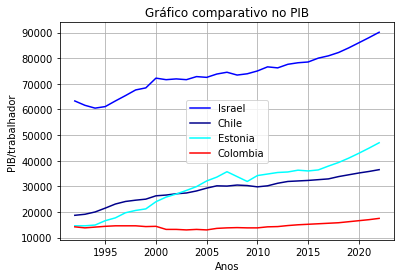

In [87]:
dados_testeGPD = dados_paisesGDP.transpose()
plt.plot(dados_paisesGDP.loc["Israel"], color = "blue")
plt.plot(dados_paisesGDP.loc["Chile"], color = "darkblue")
plt.plot(dados_paisesGDP.loc["Estonia"], color = "aqua")
plt.plot(dados_paisesGDP.loc["Colombia"], color = "red")
plt.xlabel('Anos')
plt.ylabel("PIB/trabalhador")
plt.title('Gráfico comparativo no PIB')
plt.legend()
plt.grid()


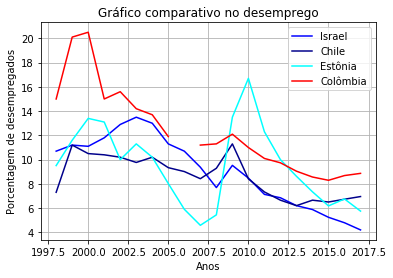

In [88]:
pais_comparadoD = dados_paisesD.transpose()
plt.plot(dados_paisesD.loc["Israel"], color = "blue")
plt.plot(dados_paisesD.loc["Chile"], color = "darkblue")
plt.plot(dados_paisesD.loc["Estônia"], color = "aqua")
plt.plot(dados_paisesD.loc["Colômbia"], color = "red")
plt.xlabel('Anos')
plt.ylabel("Porcentagem de desempregados")
plt.title('Gráfico comparativo no desemprego')
plt.legend()
plt.grid()